# Spatial trajectory-based analysis tutorial

This tutorial demonstrates how to analyze feature changes along the trajectory inferred by ONTraC.
Features may include cell type composition, gene expression, regulon activity, or any other cell-level or niche-level scores.

## Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [2]:
from optparse import Values

In [3]:
from ONTraC.analysis.data import AnaData
from ONTraC.utils import write_version_info

write_version_info()

##################################################################################

         ▄▄█▀▀██   ▀█▄   ▀█▀ █▀▀██▀▀█                   ▄▄█▀▀▀▄█
        ▄█▀    ██   █▀█   █     ██    ▄▄▄ ▄▄   ▄▄▄▄   ▄█▀     ▀
        ██      ██  █ ▀█▄ █     ██     ██▀ ▀▀ ▀▀ ▄██  ██
        ▀█▄     ██  █   ███     ██     ██     ▄█▀ ██  ▀█▄      ▄
         ▀▀█▄▄▄█▀  ▄█▄   ▀█    ▄██▄   ▄██▄    ▀█▄▄▀█▀  ▀▀█▄▄▄▄▀

                        version: 1.2.1

##################################################################################


In [4]:
from ONTraC.analysis.trajectory import (construct_meta_cell_along_trajectory,
                                        cal_features_correlation_along_trajectory,
                                        plot_scatter_feat_along_trajectory,
                                        plot_cell_type_composition_along_trajectory_from_anadata,
                                        plot_cell_type_composition_along_trajectory)

## Load Data

### Download dataset

In [5]:
import requests

# URL of the file
url = "https://zenodo.org/records/15571644/files/Stereo_seq_data.zip"

# Local file path to save the file
file_path = "./Stereo_seq_data.zip"

try:
    # Send a GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Write the content to the file
    with open(file_path, "wb") as file:
        file.write(response.content)

    print(f"File downloaded and saved to {file_path}")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


File downloaded and saved to ./Stereo_seq_data.zip


In [6]:
import zipfile

# Path to the zip file
zip_file_path = "Stereo_seq_data.zip"

# Directory where files will be extracted
extract_to_path = "./"

try:
    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all files to the specified directory
        zip_ref.extractall(extract_to_path)

    print(f"Files extracted to '{extract_to_path}'")
except zipfile.BadZipFile:
    print("The file is not a valid zip file.")


Files extracted to './'


### ONTraC output

In [7]:
vis_options = Values()
vis_options.NN_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NN/'
vis_options.GNN_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_GNN/'
vis_options.NT_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NT/'
vis_options.reverse = True
vis_options.output = None

In [8]:
ana_data = AnaData(vis_options)

In [9]:
ana_data.meta_data_df.head()

,Sample,Cell_Type,x,y
Cell_ID,,,,
E12_E1S3_100034,E12_E1S3,Fibro,15940.0,18584.0
E12_E1S3_100035,E12_E1S3,Fibro,15942.0,18623.0
E12_E1S3_100191,E12_E1S3,Endo,15965.0,18619.0
E12_E1S3_100256,E12_E1S3,Fibro,15969.0,18717.0
E12_E1S3_100264,E12_E1S3,Fibro,15974.0,18692.0


### Differentiation potency

In [10]:
ot_res1 = pd.read_csv('./Stereo_seq_data/source/moscot/E14_E16_1_cm.csv.gz', index_col=0)
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E14_E1S3_loc.csv.gz',index_col = 0)
ot_res1.index = temp.index
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E16_E1S3_loc.csv.gz',index_col = 0)
ot_res1.columns = temp.index
ot_res1.iloc[:5,:3]

,E16_E1S3_21,E16_E1S3_22,E16_E1S3_23
E14_E1S3_170808,0.0,0.0,0.0
E14_E1S3_170916,0.0,0.0,0.0
E14_E1S3_170934,0.0,0.0,0.0
E14_E1S3_171016,0.0,0.0,0.0
E14_E1S3_171024,0.0,0.0,0.0


In [11]:
ot_res2 = pd.read_csv('./Stereo_seq_data/source/moscot/E14_E16_2_cm.csv.gz', index_col=0)
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E14_E1S3_loc.csv.gz',index_col = 0)
ot_res2.index = temp.index
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E16_E2S6_loc.csv.gz',index_col = 0)
ot_res2.columns = temp.index
ot_res2.iloc[:5,:3]

,E16_E2S6_119,E16_E2S6_147,E16_E2S6_164
E14_E1S3_170808,0.0,0.0,0.0
E14_E1S3_170916,0.0,0.0,0.0
E14_E1S3_170934,0.0,0.0,0.0
E14_E1S3_171016,0.0,0.0,0.0
E14_E1S3_171024,0.0,0.0,0.0


In [12]:
ot_res3 = pd.read_csv('./Stereo_seq_data/source/moscot/E14_E16_3_cm.csv.gz', index_col=0)
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E14_E1S3_loc.csv.gz',index_col = 0)
ot_res3.index = temp.index
temp = pd.read_csv('./Stereo_seq_data/source/moscot/ss0_E16_E2S7_loc.csv.gz',index_col = 0)
ot_res3.columns = temp.index
ot_res3.iloc[:5,:3]

,E16_E2S7_291152,E16_E2S7_291165,E16_E2S7_291300
E14_E1S3_170808,0.0,1.598103e-18,0.0
E14_E1S3_170916,0.0,0.000000e+00,0.0
E14_E1S3_170934,0.0,0.000000e+00,0.0
E14_E1S3_171016,0.0,0.000000e+00,0.0
E14_E1S3_171024,0.0,0.000000e+00,0.0


### Gene expression

In [13]:
E14_RGC_scaled_exp = pd.read_csv('./Stereo_seq_data/source/stereo_seq_E14_RGC_scaled_exp.csv.gz', index_col=0)
E14_RGC_scaled_exp.iloc[:5,:3]

,0610005C13Rik,0610006L08Rik,0610009B22Rik
Cell_ID,,,
E14_E1S3_171289,-0.036511,-0.008535,-0.198124
E14_E1S3_171863,-0.036511,-0.008535,-0.198124
E14_E1S3_171967,-0.036511,-0.008535,-0.198124
E14_E1S3_171983,-0.036511,-0.008535,-0.198124
E14_E1S3_172013,-0.036511,-0.008535,-0.198124


### Regulon activities

In [14]:
regulon_aucell_df = pd.read_csv('./Stereo_seq_data/source/stereo_seq.auc.csv.gz', index_col=0)
regulon_aucell_df.iloc[:5,:5]

,Ahr,Alx1,Alx3,Alx4,Ar
Cell,,,,,
E12_E1S3_100034,0.0,0.014262,0.009032,0.038966,0.0
E12_E1S3_100035,0.0,0.017741,0.017087,0.000000,0.0
E12_E1S3_100191,0.0,0.009400,0.009933,0.026062,0.0
E12_E1S3_100256,0.0,0.017928,0.017399,0.000000,0.0
E12_E1S3_100264,0.0,0.019671,0.019565,0.042947,0.0


## Spatial distribution of NT scores

We visualize the spatial distribution of NT scores for each cell to illustrate the spatial trajectory.

### Spatial distribution of NT scores for all cells

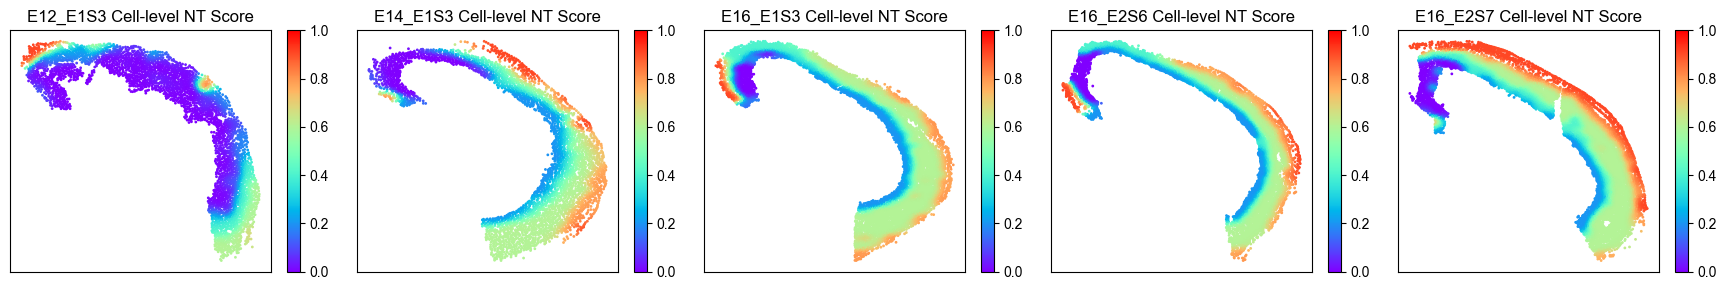

In [15]:
from ONTraC.analysis.spatial import plot_cell_NT_score_dataset_from_anadata

fig, axes = plot_cell_NT_score_dataset_from_anadata(ana_data)

### Spatial distribution of NT scores for E14.5 RGCs only

In [16]:
# Selecting E14.5 RGCs from the dataset
plot_meta_data = ana_data.meta_data_df[(ana_data.meta_data_df['Sample'] == 'E14_E1S3') & (ana_data.meta_data_df['Cell_Type'] == 'RGC')]
plot_meta_data.head()

,Sample,Cell_Type,x,y
Cell_ID,,,,
E14_E1S3_171289,E14_E1S3,RGC,19941.0,9116.0
E14_E1S3_171863,E14_E1S3,RGC,20024.0,9512.0
E14_E1S3_171967,E14_E1S3,RGC,20040.0,9397.0
E14_E1S3_171983,E14_E1S3,RGC,20040.0,9219.0
E14_E1S3_172013,E14_E1S3,RGC,20036.0,9352.0


In [17]:
plot_NT_score = ana_data.NT_score.loc[plot_meta_data.index]
plot_NT_score.head()

,x,y,Niche_NTScore,Cell_NTScore
Cell_ID,,,,
E14_E1S3_171289,19941.0,9116.0,0.862209,0.894205
E14_E1S3_171863,20024.0,9512.0,0.983229,0.979535
E14_E1S3_171967,20040.0,9397.0,0.994614,0.980553
E14_E1S3_171983,20040.0,9219.0,0.988135,0.958657
E14_E1S3_172013,20036.0,9352.0,0.994703,0.976718


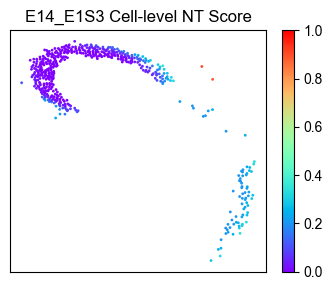

In [18]:
# visualization

from ONTraC.analysis.spatial import plot_cell_NT_score_dataset

fig, ax = plot_cell_NT_score_dataset(meta_data_df=plot_meta_data,
                                     NT_score=plot_NT_score,
                                     reverse=ana_data.options.reverse
                                   )

## Cell type composition along spatial trajcetory

Cell type composition along the spatial trajectory reflects changes in the microenvironment.

### Cell type composition change for all cells

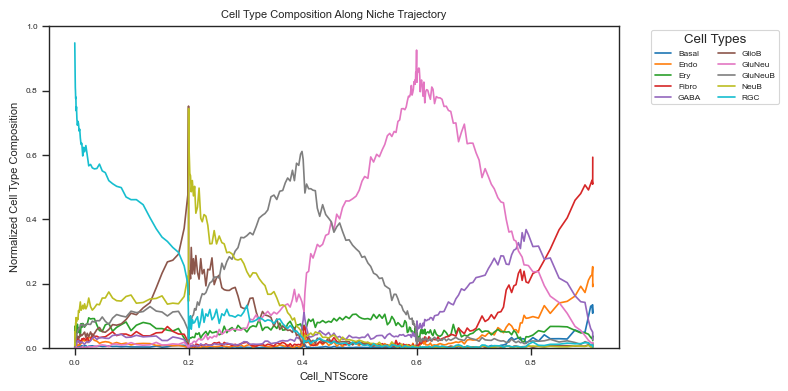

In [19]:
fig, ax = plot_cell_type_composition_along_trajectory_from_anadata(
    ana_data=ana_data,  # AnaData object
    cell_types=None,  # Column name(s) in AnaData.meta_data_df that contains the cell type information.
                      # Default is None, which means all cell types in AnaData.cell_type_codes will be used.
    agg_cell_num=100,  # Number of cells to aggregate in each bin along the trajectory. Default is 10. 1 means no aggregation.
    figsize=(8,4),  # Figure size. Default is (6, 2).
    palette=None,  # Color palette for cell types. If None, use default color palette. Keys are cell types and values are colors.
    output_file_path=None  # Path to save the figure. If None, the default path
                           # {ana_data.options.output}/lineplot_raw_cell_type_composition_along_trajectory.pdf is used. 
                           # If ana_data.options.output is also None, the figure will not be saved and the function 
                           # will return the figure and axes objects instead.
)

We observe that the dominant cell type shifts along the spatial trajectory, from RGCs (undifferentiated cells) to NeuB, GluNeuB, and ultimately to fully differentiated cells such as GluNeu and GABA neurons.

### Cell type composition change for RGC only

In [20]:
# create data_df
data_df = ana_data.meta_data_df.copy()
data_df = data_df.join(1 - ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])
data_df = data_df.join(ana_data.cell_type_composition)

In [21]:
# filtering with cell type
data_df = data_df[data_df['Cell_Type'] == 'RGC']

In [22]:
cell_types = ana_data.cell_type_codes['Cell_Type'].values.tolist()

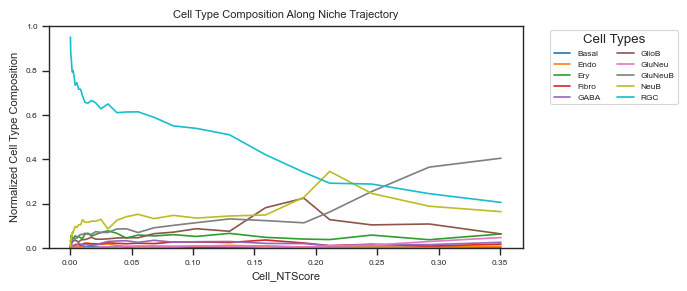

In [23]:
fig ,ax = plot_cell_type_composition_along_trajectory(
    data_df=data_df,
    trajectory='Cell_NTScore',
    cell_types=cell_types, # type: ignore
    agg_cell_num=100,
    figsize=(7,3),
    palette=None,
    output_file_path=None,
)

In E14.5, RGCs are primarily located within RGC-dominant microenvironments. Along the spatial trajectory, the proportion of RGCs gradually decreases, while NeuB and GluNeuB cells increase sequentially.
We will explore the features associated with this dynamic in the following sections.

## Differentiation potency along trajectory

We can investigate differentiation potency by using [Moscot](https://moscot.readthedocs.io/en/latest/) to predict the potential offspring of RGCs in the next stage (E16.5).
The Moscot output have been loaded in previous section.

### Selecting RGCs from Moscot results and aggregate replicates information

In [24]:
target_cells = ana_data.meta_data_df[(ana_data.meta_data_df['Cell_Type'] == 'RGC') & (ana_data.meta_data_df['Sample'] == 'E14_E1S3')]

In [25]:
def ot_res_process(ot_res):
    ot_res = ot_res.loc[ot_res.index.isin(ana_data.meta_data_df.index),
                       ot_res.columns.isin(ana_data.meta_data_df.index)]
    top_5_indices = ot_res.apply(lambda row: row.nlargest(5).index, axis=1)
    top_5_cell_types = top_5_indices.apply(lambda x: ana_data.meta_data_df.loc[x, 'Cell_Type'])
    summary_df = top_5_cell_types.apply(lambda x: x.value_counts(), axis=1).fillna(0).astype(int)
    summary_df = summary_df.loc[target_cells.index]
    summary_df = summary_df.div(summary_df.sum(axis=1).values, axis=0)
    summary_df = summary_df.join(1-ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])
    
    return summary_df
    

In [26]:
summary_df_1 = ot_res_process(ot_res1)
summary_df_1.iloc[:5,:5]


,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_171289,0.0,0.0,0.0,0.2,0.4
E14_E1S3_171863,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171967,0.0,0.0,0.0,0.0,0.0
E14_E1S3_171983,0.0,0.0,0.0,0.0,0.2
E14_E1S3_172013,0.0,0.0,0.0,0.0,0.2


In [27]:
E14_RGC_metacell_diff_p_1_df = construct_meta_cell_along_trajectory(
    meta_data_df = summary_df_1,
    trajectory = 'Cell_NTScore',
    n_cells = 10)
E14_RGC_metacell_diff_p_1_df.iloc[:5,:5]

,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_173789,0.0,0.0,0.00,0.00,0.02
E14_E1S3_173259,0.0,0.0,0.00,0.02,0.00
E14_E1S3_174106,0.0,0.0,0.02,0.00,0.00
E14_E1S3_173417,0.0,0.0,0.00,0.02,0.08
E14_E1S3_173284,0.0,0.0,0.06,0.00,0.08


In [28]:
summary_df_2 = ot_res_process(ot_res2)
E14_RGC_metacell_diff_p_2_df = construct_meta_cell_along_trajectory(
    meta_data_df = summary_df_2,
    trajectory = 'Cell_NTScore',
    n_cells = 10)
E14_RGC_metacell_diff_p_2_df.iloc[:5,:5]


,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_173789,0.0,0.0,0.02,0.06,0.12
E14_E1S3_173259,0.0,0.0,0.00,0.00,0.08
E14_E1S3_174106,0.0,0.0,0.02,0.04,0.04
E14_E1S3_173417,0.0,0.0,0.02,0.00,0.04
E14_E1S3_173284,0.0,0.0,0.00,0.02,0.10


In [29]:
summary_df_3 = ot_res_process(ot_res3)
E14_RGC_metacell_diff_p_3_df = construct_meta_cell_along_trajectory(
    meta_data_df = summary_df_3,
    trajectory = 'Cell_NTScore',
    n_cells = 10)
E14_RGC_metacell_diff_p_3_df.iloc[:5,:5]


,Basal,Endo,Ery,Fibro,GABA
Cell_ID,,,,,
E14_E1S3_173789,0.00,0.0,0.00,0.12,0.02
E14_E1S3_173259,0.02,0.0,0.02,0.04,0.02
E14_E1S3_174106,0.00,0.0,0.12,0.06,0.08
E14_E1S3_173417,0.02,0.0,0.04,0.06,0.04
E14_E1S3_173284,0.00,0.0,0.02,0.06,0.12


In [30]:
E14_RGC_metacell_diff_p_1_melted_df = E14_RGC_metacell_diff_p_1_df.melt(
    id_vars='Cell_NTScore',
    value_vars=E14_RGC_metacell_diff_p_1_df.columns.tolist()[:-1],
    var_name='Cell type',
    value_name='Proportion')
E14_RGC_metacell_diff_p_1_melted_df['replicate'] = ['rep1'] * E14_RGC_metacell_diff_p_1_melted_df.shape[0]
E14_RGC_metacell_diff_p_1_melted_df.iloc[:5,:5]


,Cell_NTScore,Cell type,Proportion,replicate
0,0.000230,Basal,0.0,rep1
1,0.000240,Basal,0.0,rep1
2,0.000250,Basal,0.0,rep1
3,0.000266,Basal,0.0,rep1
4,0.000285,Basal,0.0,rep1


In [31]:
E14_RGC_metacell_diff_p_2_melted_df = E14_RGC_metacell_diff_p_2_df.melt(
    id_vars='Cell_NTScore',
    value_vars=E14_RGC_metacell_diff_p_2_df.columns.tolist()[:-1],
    var_name='Cell type',
    value_name='Proportion')
E14_RGC_metacell_diff_p_2_melted_df['replicate'] = ['rep2'] * E14_RGC_metacell_diff_p_2_melted_df.shape[0]
E14_RGC_metacell_diff_p_2_melted_df.iloc[:5,:5]


,Cell_NTScore,Cell type,Proportion,replicate
0,0.000230,Basal,0.0,rep2
1,0.000240,Basal,0.0,rep2
2,0.000250,Basal,0.0,rep2
3,0.000266,Basal,0.0,rep2
4,0.000285,Basal,0.0,rep2


In [32]:
E14_RGC_metacell_diff_p_3_melted_df = E14_RGC_metacell_diff_p_3_df.melt(
    id_vars='Cell_NTScore',
    value_vars=E14_RGC_metacell_diff_p_3_df.columns.tolist()[:-1],
    var_name='Cell type',
    value_name='Proportion')
E14_RGC_metacell_diff_p_3_melted_df['replicate'] = ['rep3'] * E14_RGC_metacell_diff_p_3_melted_df.shape[0]
E14_RGC_metacell_diff_p_3_melted_df.iloc[:5,:5]


,Cell_NTScore,Cell type,Proportion,replicate
0,0.000230,Basal,0.00,rep3
1,0.000240,Basal,0.02,rep3
2,0.000250,Basal,0.00,rep3
3,0.000266,Basal,0.02,rep3
4,0.000285,Basal,0.00,rep3


In [33]:
E14_RGC_metacell_diff_p_melted = pd.concat([E14_RGC_metacell_diff_p_1_melted_df,
                                            E14_RGC_metacell_diff_p_2_melted_df,
                                            E14_RGC_metacell_diff_p_3_melted_df])
E14_RGC_metacell_diff_p_melted.head()

,Cell_NTScore,Cell type,Proportion,replicate
0,0.000230,Basal,0.0,rep1
1,0.000240,Basal,0.0,rep1
2,0.000250,Basal,0.0,rep1
3,0.000266,Basal,0.0,rep1
4,0.000285,Basal,0.0,rep1


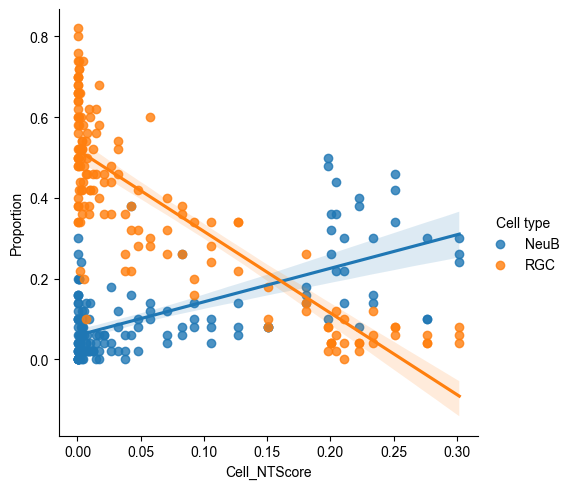

In [34]:
sns.lmplot(data = E14_RGC_metacell_diff_p_melted[E14_RGC_metacell_diff_p_melted['Cell type'].isin(['RGC', 'NeuB'])],
           x = 'Cell_NTScore',
           y = 'Proportion',
           hue = 'Cell type',
           scatter_kws={'edgecolor': None},
           ci=95,
          )

Along the spatial trajectory, the probability of RGCs maintaining their identity decreases, while the probability of their differentiation into NeuB increases.

## Gene expression changes along spatial trajectory

Next, we explore gene expression dynamics along the spatial trajectory.

In [35]:
E14_RGC_gene_exp_df = E14_RGC_scaled_exp.join(1 - ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])

In [36]:
# The meta-cell could reduce the noise here
E14_RGC_gene_exp_metacell_data_df = construct_meta_cell_along_trajectory(
    meta_data_df = E14_RGC_gene_exp_df,
    trajectory = 'Cell_NTScore',
    n_cells = 10
)
E14_RGC_gene_exp_metacell_data_df.iloc[:5,:3]


,0610005C13Rik,0610006L08Rik,0610009B22Rik
Cell_ID,,,
E14_E1S3_173789,-0.036511,-0.008535,-0.198124
E14_E1S3_173259,-0.036511,-0.008535,-0.198124
E14_E1S3_174106,-0.036511,-0.008535,-0.198124
E14_E1S3_173417,-0.036511,-0.008535,-0.198124
E14_E1S3_173284,-0.036511,-0.008535,-0.198124


In [37]:
gene_correlated_df = cal_features_correlation_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    rho_threshold=0.4,
    p_val_threshold=0.01
)
print(gene_correlated_df.shape)

/sc/arion/work/wangw32/conda-env/envs/ONTraC/lib/python3.11/site-packages/ONTraC/analysis/trajectory.py:102: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p_val = pearsonr(data_df[trajectory], data_df[feat])


(109, 2)


We identified 109 genes whose expression levels are significantly correlated with cell-level NT scores.
Here, we highlight six representative genes that are strongly associated with neuronal differentiation and maturation.

In [38]:
gene_correlated_df.head()

,PCC,P_Value
Feature,,
Cdkn1c,0.629617,9.666948e-07
Gm3764,0.623302,1.333598e-06
Lbh,0.618297,1.712368e-06
Bbs9,0.550067,3.502920e-05
Phf21b,0.542046,4.788367e-05


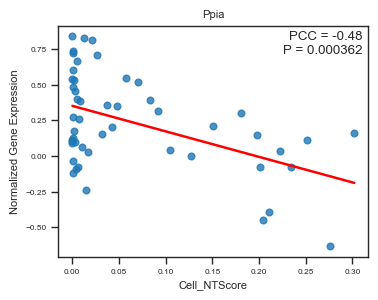

In [39]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Ppia',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
)

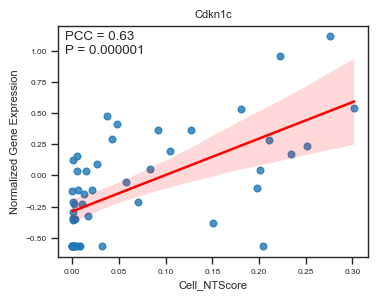

In [40]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Cdkn1c',
    fit_reg = True,
    annotate_pos = 'upper left',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    ci=95,  # Size of the confidence interval for the regression estimate
)

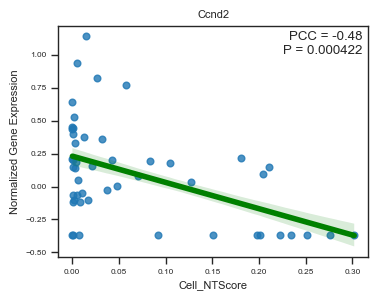

In [41]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Ccnd2',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    line_kws = {'color': 'green', 'lw': 4},  # line parameters
    ci=70,  # Size of the confidence interval for the regression estimate
)

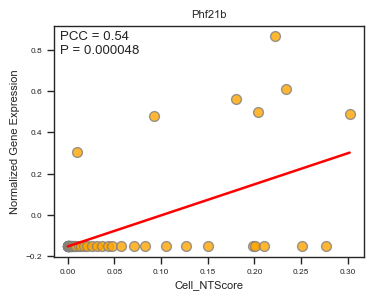

In [42]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Phf21b',
    fit_reg = True,
    annotate_pos = 'upper left',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    scatter_kws = {'color': 'orange', 'edgecolor': 'gray', 's': 50},  # scatter parameters
)

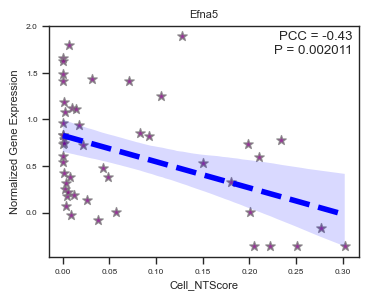

In [43]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Efna5',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    scatter_kws = {'color': 'purple', 'edgecolor': 'gray', 's': 50},  # scatter parameters
    line_kws = {'color': 'blue', 'lw': 4, 'ls': '--'},  # line parameters
    ci = 95,  # Size of the confidence interval for the regression estimate
    marker = '*',  # Marker to use for the scatterplot glyphs.
)

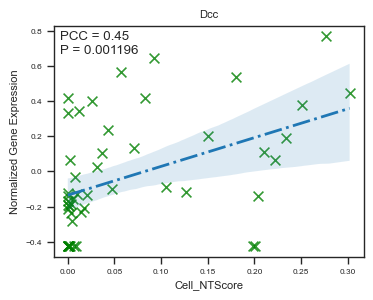

In [44]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Dcc',
    fit_reg = True,
    annotate_pos = 'upper left',
    figszie = (4,3),
    ylabel = 'Normalized Gene Expression',
    scatter_kws = {'color': 'green', 's': 50},  # scatter parameters
    line_kws = {'color': 'C0', 'lw': 2, 'ls': '-.'},  # line parameters
    ci = 95,  # Size of the confidence interval for the regression estimate.
    marker = 'x',  # Marker to use for the scatterplot glyphs.
)

You can also select top N genes by following command:

In [45]:
cal_features_correlation_along_trajectory(
    data_df = E14_RGC_gene_exp_metacell_data_df,
    trajectory = 'Cell_NTScore',
    top_n=5,
    rho_threshold=0.4,
    p_val_threshold=0.01
)

/sc/arion/work/wangw32/conda-env/envs/ONTraC/lib/python3.11/site-packages/ONTraC/analysis/trajectory.py:102: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p_val = pearsonr(data_df[trajectory], data_df[feat])


,PCC,P_Value
Feature,,
Cdkn1c,0.629617,9.666948e-07
Gm3764,0.623302,1.333598e-06
Lbh,0.618297,1.712368e-06
Bbs9,0.550067,3.502920e-05
Phf21b,0.542046,4.788367e-05
Mcm3,-0.453214,9.492690e-04
Eif2s2,-0.456194,8.696506e-04
Tuba1b,-0.470727,5.608145e-04
Ccnd2,-0.479827,4.218648e-04


## Regulon activity changes along spatial trajectory

To gain mechanistic insights, we performed gene regulatory network (GRN) analysis using the [SCENIC workflow](https://scenic.aertslab.org/) and explore regulon activity changes along spatial trajectory.


In [46]:
E14_RGC_regulon_aucell_df = regulon_aucell_df.loc[target_cells.index]
E14_RGC_regulon_aucell_df = E14_RGC_regulon_aucell_df.join(1-ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])
E14_RGC_regulon_aucell_df.iloc[:5,:3]


,Ahr,Alx1,Alx3
Cell_ID,,,
E14_E1S3_171289,0.0,0.015500,0.014530
E14_E1S3_171863,0.0,0.018301,0.017757
E14_E1S3_171967,0.0,0.011018,0.009434
E14_E1S3_171983,0.0,0.020709,0.000000
E14_E1S3_172013,0.0,0.009773,0.008186


In [47]:
E14_RGC_regulon_aucell_metacell_data_df = construct_meta_cell_along_trajectory(meta_data_df = E14_RGC_regulon_aucell_df,
                                                                trajectory = 'Cell_NTScore',
                                                                n_cells = 10)
E14_RGC_regulon_aucell_metacell_data_df.iloc[:5,:3]


,Ahr,Alx1,Alx3
Cell_ID,,,
E14_E1S3_173789,0.0,0.012552,0.019366
E14_E1S3_173259,0.0,0.019238,0.021671
E14_E1S3_174106,0.0,0.010374,0.022217
E14_E1S3_173417,0.0,0.024025,0.014273
E14_E1S3_173284,0.0,0.016657,0.011069


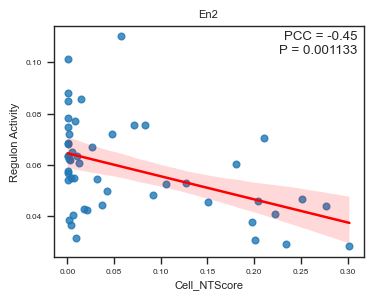

In [48]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_regulon_aucell_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'En2',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Regulon Activity',
    ci = 95,
)

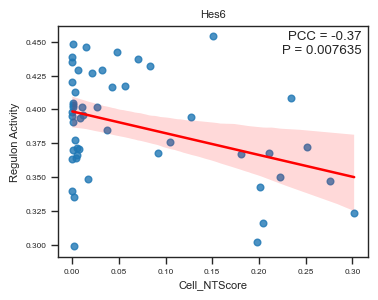

In [49]:
fig, ax = plot_scatter_feat_along_trajectory(
    data_df = E14_RGC_regulon_aucell_metacell_data_df,
    trajectory = 'Cell_NTScore',
    feature = 'Hes6',
    fit_reg = True,
    annotate_pos = 'upper right',
    figszie = (4,3),
    ylabel = 'Regulon Activity',
    ci = 95,
)

We identified several regulons whose activity scores are significantly correlated with cell-level NT scores (spatial trajectory).

## Session Info

In [50]:
import session_info

session_info.show()